In [3]:
# import Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [5]:
# Load existing train/test datasets
X_train = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/06_Outputs/train_data.csv").drop('Actual', axis=1)
y_train = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/06_Outputs/train_data.csv")['Actual']

X_test = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/06_Outputs/test_data.csv").drop('Actual', axis=1)
y_test = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/06_Outputs/test_data.csv")['Actual']

In [7]:
# Define models
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

best_model = None
best_model_name = None
best_auc = 0

In [9]:
# Train and evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"{name} ROC AUC: {auc:.4f}")

    if auc > best_auc:
        best_auc = auc
        best_model = model
        best_model_name = name



Training DecisionTree...
DecisionTree ROC AUC: 0.6625

Training XGBoost...


C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [10:20:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost ROC AUC: 0.8185

Training SVM...
SVM ROC AUC: 0.7984


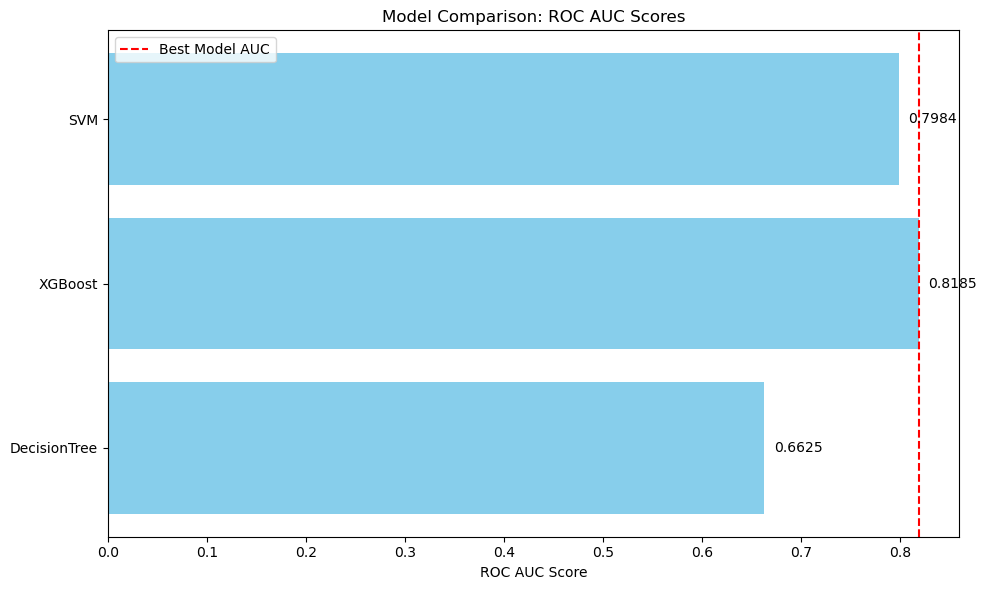

In [11]:
# Visualize ROC AUC scores
auc_scores = [roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) for model in models.values()]
model_names = list(models.keys())
plt.figure(figsize=(10, 6))
plt.barh(model_names, auc_scores, color='skyblue')
plt.xlabel('ROC AUC Score')
plt.title('Model Comparison: ROC AUC Scores')
for i, v in enumerate(auc_scores):
    plt.text(v + 0.01, i, f"{v:.4f}", color='black', va='center')
plt.axvline(x=best_auc, color='red', linestyle='--', label='Best Model AUC')
plt.legend()
plt.tight_layout()
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/06_Outputs/model_comparison_auc.png")
# Show the plot
plt.show()
        
# ---- End of Program --- #